In [2]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import warnings
import glob
import h5py
import json
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.stats import gaussian_kde
from fair.constants import molwt
import matplotlib.gridspec as gridspec
from ar6.utils import check_and_download

In [3]:
pl.rcParams['figure.figsize'] = (12/2.54, 12/2.54)
pl.rcParams['font.size'] = 8
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['xtick.direction'] = 'in'
pl.rcParams['ytick.direction'] = 'in'
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 96

In [4]:
warnings.simplefilter('ignore')

In [5]:
cubes = {}
models = ['CanESM5', 'E3SM', 'GFDL-ESM4', 'GFDL-CM4', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM', 'UKESM1-0-LL']

endyear = {
    'CanESM5'    : 2100,
    'MIROC6'     : 2100,
    'NorESM2-LM' : 2014,
    'GISS-E2-1-G': 2100,
    'HadGEM3-GC31-LL': 2099,
    'GFDL-CM4'   : 2100,
    'E3SM'       : 2014,
    'UKESM1-0-LL': 2014,
    'GFDL-ESM4'  : 2014,
    'IPSL-CM6A-LR': 2100,
    'MRI-ESM2-0' : 2014,
}

startyear = {
    'CanESM5'    : 1850,
    'MIROC6'     : 1850,
    'NorESM2-LM' : 1850,
    'GISS-E2-1-G': 1850,
    'HadGEM3-GC31-LL': 1850,
    'GFDL-CM4'   : 1850,
    'E3SM'       : 1870,
    'GFDL-ESM4'  : 1850,
    'UKESM1-0-LL': 1850,
    'IPSL-CM6A-LR': 1850,
    'MRI-ESM2-0': 1850,
}

In [6]:
colors = {
    'CanESM5'    :  'red',#'#1e4c24',
    'E3SM'       : 'darkorange',
    'GFDL-ESM4'  : 'yellow', 
    'GFDL-CM4'   : 'yellowgreen',#'green',
    'GISS-E2-1-G':  'green',#'#771d7b',
    'HadGEM3-GC31-LL': 'turquoise',
    'IPSL-CM6A-LR': 'teal',
    'MIROC6'     :  'blue',#b85fb7',
    'MRI-ESM2-0' : 'blueviolet',
    'NorESM2-LM' :  'purple',#'red',
    'UKESM1-0-LL': 'crimson',
    'mean'       : 'black',
    'AR5'         : '0.6',
    'AR6'         : '0.3',
    'Lund'        : 'pink',
}

In [7]:
cubes = {}

for model in models:
    cubes[model] =  pd.read_csv('../data_input/%s.csv' % model)  # will change
    cubes[model].set_index('year', inplace=True)
#     df['year'] = np.arange(startyear[model]+0.5, endyear[model]+1)
#     for var in ['erf', 'erf_sw', 'erf_lw','aprp_ERFariSW', 'aprp_ERFaciSW', 'aprp_ERFariLW', 'aprp_ERFaciLW', 'aprp_albedo',
#                 'aprp_t9']:
#         df[var] = cubes[model][var].data
#     df.set_index('year', inplace=True)
#    df.to_csv('../data/%s.csv' % model)
cubes['CanESM5']

,erf,erf_sw,erf_lw,aprp_ERFariSW,aprp_ERFaciSW,aprp_ERFariLW,aprp_ERFaciLW,aprp_albedo,aprp_t9
year,,,,,,,,,
1850.5,-0.056411,-0.012546,-0.043865,-0.038897,0.026163,-0.071697,0.027832,-0.006923,0.005664
1851.5,0.002193,-0.010708,0.012901,-0.012279,0.011233,-0.022048,0.034949,-0.000776,-0.026092
1852.5,0.040748,-0.027904,0.068653,0.004813,-0.007301,0.046973,0.021680,-0.011223,-0.047048
1853.5,0.011026,-0.003637,0.014663,0.002971,0.007722,-0.018817,0.033479,-0.008680,-0.093939
1854.5,-0.068579,0.026503,-0.095081,0.043915,0.002132,-0.105349,0.010268,0.000403,0.039951
...,...,...,...,...,...,...,...,...,...
2096.5,-0.503850,-0.555937,0.052087,-0.097492,-0.440797,0.044686,0.007402,-0.013595,-0.076017
2097.5,-0.510893,-0.598792,0.087899,-0.121421,-0.430272,0.109054,-0.021155,-0.015885,-0.040576
2098.5,-0.353960,-0.481014,0.127054,-0.087114,-0.372218,0.098973,0.028081,0.006737,-0.075541


In [113]:
check_and_download(
    '../data_input_large/rcmip-emissions-annual-means-v5-1-0.csv',
    'https://rcmip-protocols-au.s3-ap-southeast-2.amazonaws.com/v5.1.0/rcmip-emissions-annual-means-v5-1-0.csv'
)
    
emissions = pd.read_csv('../data_input_large/rcmip-emissions-annual-means-v5-1-0.csv')

In [114]:
df_emissions = pd.concat([emissions.loc[(
        (emissions.Variable=='Emissions|BC')|
        (emissions.Variable=='Emissions|OC')|
        (emissions.Variable=='Emissions|Sulfur')|
        (emissions.Variable=='Emissions|NOx')|
        (emissions.Variable=='Emissions|NH3')
    ) & (emissions.Scenario=='ssp245') & (emissions.Region=='World'), 'Variable'], emissions.loc[(
        (emissions.Variable=='Emissions|BC')|
        (emissions.Variable=='Emissions|OC')|
        (emissions.Variable=='Emissions|Sulfur')|
        (emissions.Variable=='Emissions|NOx')|
        (emissions.Variable=='Emissions|NH3')
    ) & (emissions.Scenario=='ssp245') & (emissions.Region=='World'), '1750':'2100']], axis=1)#.interpolate(axis=1).T
df_emissions.set_index('Variable', inplace=True)
df_emissions = df_emissions.interpolate(axis=1).T
df_emissions.rename(
    columns={
        'Emissions|BC': 'BC',
        'Emissions|OC': 'OC',
        'Emissions|Sulfur': 'SO2',
        'Emissions|NOx': 'NOx',
        'Emissions|NH3': 'NH3',
    }, inplace=True
)
# only keep cols we want
emissions = df_emissions[['SO2', 'BC', 'OC', 'NH3']]
emissions.index = emissions.index.astype('int')
emissions.index.name='year'
emissions.columns.name=None
emissions

,SO2,BC,OC,NH3
year,,,,
1750,2.440048,2.097771,15.447668,6.927690
1751,2.408379,2.072926,15.188717,6.860142
1752,2.397116,2.064312,15.034476,6.819482
1753,2.410693,2.071951,15.182545,6.881439
1754,2.462065,2.099350,15.558773,7.015189
...,...,...,...,...
2096,31.757785,2.800165,15.001741,66.175403
2097,31.523938,2.762863,14.886222,65.973947
2098,31.290090,2.725561,14.770703,65.772490


In [115]:
# # start here - > 1 row needed
# df_emissions = emissions[
#     (
#         (emissions.Variable=='Emissions|BC')|
#         (emissions.Variable=='Emissions|OC')|
#         (emissions.Variable=='Emissions|Sulfur')|
#         (emissions.Variable=='Emissions|NOx')|
#         (emissions.Variable=='Emissions|NH3')
#     ) & (emissions.Scenario=='ssp245') & (emissions.Region=='World')
# ].loc[:,'1750':'2100'].interpolate(axis=1).T

# df_emissions.rename(
#     columns={
#         'Emissions|BC': 'BC',
#         'Emissions|OC': 'OC',
#         'Emissions|Sulfur': 'SO2',
#         'Emissions|NOx': 'NOx',
#         'Emissions|NH3': 'NH3',
#     }, inplace=True
# )

# #df_emissions.columns = ['BC', 'OC', 'SO2', 'NOx', 'NH3']
# #df_emissions
# # just keep cols and order we want
# #emissions = df_emissions[['SO2', 'BC', 'OC']]
# df_emissions
# #emissions.loc[(emissions['Scenario']=='ssp245')&(emissions['Region']=='World')&
# #              ((emissions['Variable']=='Emissions|BC') | (emissions['Variable']=='Emissions|OC')
# #                                                                               ),'1750':'2020'].interpolate(axis=1, pad=True)#.squeeze()


In [116]:
emissions

,SO2,BC,OC,NH3
year,,,,
1750,2.440048,2.097771,15.447668,6.927690
1751,2.408379,2.072926,15.188717,6.860142
1752,2.397116,2.064312,15.034476,6.819482
1753,2.410693,2.071951,15.182545,6.881439
1754,2.462065,2.099350,15.558773,7.015189
...,...,...,...,...
2096,31.757785,2.800165,15.001741,66.175403
2097,31.523938,2.762863,14.886222,65.973947
2098,31.290090,2.725561,14.770703,65.772490


In [117]:
def aerocom(x, bc, oc, so2):
    return bc*x[0] + oc*x[1] + so2*x[2]

def ghan(x, beta, n0, n1):
    return -beta*np.log(1 + x[0]/n0 + x[1]/n1)

def aerocom_n(x, bc, oc, so2, nh3):
    return bc*x[0] + oc*x[1] + so2*x[2] + nh3*x[3]

def shindell(x, beta, n0, n1, n2):
    return -beta*np.log(1 + x[0]/n0 + x[1]/n1 + x[2]/n2)

In [120]:
coeff = {}

for model in models:
    coeff[model] = {}

    coeff[model]['ERFari'] = {}
    p, cov = curve_fit(
        aerocom_n, 
        emissions.loc[str(startyear[model]):str(endyear[model]), ['BC','OC','SO2','NH3']].values.T
           -emissions.loc['1850':'1850', ['BC','OC','SO2','NH3']].values.T,
        cubes[model]['aprp_ERFariSW']+cubes[model]['aprp_ERFariLW'])
    coeff[model]['ERFari']['BC'] = p[0]
    coeff[model]['ERFari']['OC'] = p[1]
    coeff[model]['ERFari']['SO2'] = p[2]
    coeff[model]['ERFari']['NH3'] = p[3]


    coeff[model]['ERFaci'] = {}
    p, cov = curve_fit(
        ghan, 
        [
            emissions.loc[str(startyear[model]):str(endyear[model]), 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T,
            (
                emissions.loc[str(startyear[model]):str(endyear[model]), 'BC'].values.T-emissions.loc['1850':'1850', 'BC'].values.T+
                emissions.loc[str(startyear[model]):str(endyear[model]), 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
            )
        ],
        cubes[model]['aprp_ERFaciSW']+cubes[model]['aprp_ERFaciLW'],#-cubes[model]['aprp_ERFariSW'],
        #bounds = ((0, 10), (np.inf, np.inf))
    )
    coeff[model]['ERFaci']['beta'] = p[0]
    coeff[model]['ERFaci']['n0']   = p[1]
    coeff[model]['ERFaci']['n1']   = p[2]

In [72]:
coeff = {}

for model in models:
    coeff[model] = {}

    coeff[model]['ERFari'] = {}
    p, cov = curve_fit(
        aerocom, 
        emissions.loc[str(startyear[model]):str(endyear[model]), ['BC','OC','SO2']].values.T
           -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
        cubes[model]['aprp_ERFariSW']+cubes[model]['aprp_ERFariLW'])
    coeff[model]['ERFari']['BC'] = p[0]
    coeff[model]['ERFari']['OC'] = p[1]
    coeff[model]['ERFari']['SO2'] = p[2]
    
    coeff[model]['ERFariSW'] = {}
    p, cov = curve_fit(
        aerocom, 
        emissions.loc[str(startyear[model]):str(endyear[model]), ['BC','OC','SO2']].values.T
           -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
        cubes[model]['aprp_ERFariSW'])
    coeff[model]['ERFariSW']['BC'] = p[0]
    coeff[model]['ERFariSW']['OC'] = p[1]
    coeff[model]['ERFariSW']['SO2'] = p[2]
    
    coeff[model]['ERFariLW'] = {}
    p, cov = curve_fit(
        aerocom, 
        emissions.loc[str(startyear[model]):str(endyear[model]), ['BC','OC','SO2']].values.T
           -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
        cubes[model]['aprp_ERFariLW'])
    coeff[model]['ERFariLW']['BC'] = p[0]
    coeff[model]['ERFariLW']['OC'] = p[1]
    coeff[model]['ERFariLW']['SO2'] = p[2]

    coeff[model]['ERFaci'] = {}
    p, cov = curve_fit(
        ghan, 
        [
            emissions.loc[str(startyear[model]):str(endyear[model]), 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T,
            (
                emissions.loc[str(startyear[model]):str(endyear[model]), 'BC'].values.T-emissions.loc['1850':'1850', 'BC'].values.T+
                emissions.loc[str(startyear[model]):str(endyear[model]), 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
            )
        ],
        cubes[model]['aprp_ERFaciSW']+cubes[model]['aprp_ERFaciLW'],#-cubes[model]['aprp_ERFariSW'],
        #bounds = ((0, 10), (np.inf, np.inf))
    )
    coeff[model]['ERFaci']['beta'] = p[0]
    coeff[model]['ERFaci']['n0']   = p[1]
    coeff[model]['ERFaci']['n1']   = p[2]

    coeff[model]['ERFaciSW'] = {}
    p, cov = curve_fit(
        ghan, 
        [
            emissions.loc[str(startyear[model]):str(endyear[model]), 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T,
            (
                emissions.loc[str(startyear[model]):str(endyear[model]), 'BC'].values.T-emissions.loc['1850':'1850', 'BC'].values.T+
                emissions.loc[str(startyear[model]):str(endyear[model]), 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
            )
        ],
        cubes[model]['aprp_ERFaciSW'],#-cubes[model]['aprp_ERFariSW'],
        maxfev=80000,
        #bounds = ((0, 10), (np.inf, np.inf))
    )
    coeff[model]['ERFaciSW']['beta'] = p[0]
    coeff[model]['ERFaciSW']['n0']   = p[1]
    coeff[model]['ERFaciSW']['n1']   = p[2]
    
    coeff[model]['ERFaciLW'] = {}
    p, cov = curve_fit(
        aerocom, 
        emissions.loc[str(startyear[model]):str(endyear[model]), ['BC','OC','SO2']].values.T
           -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
        cubes[model]['aprp_ERFaciLW'])
    coeff[model]['ERFaciLW']['BC'] = p[0]
    coeff[model]['ERFaciLW']['OC'] = p[1]
    coeff[model]['ERFaciLW']['SO2'] = p[2]

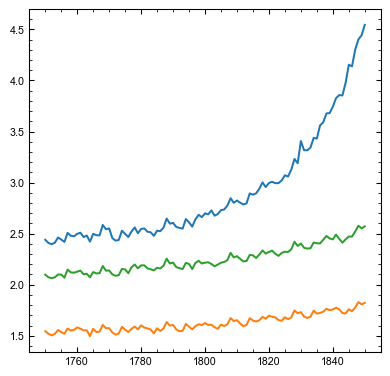

In [84]:
pl.plot(emissions.loc[1750:1850, 'SO2'])
pl.plot(emissions.loc[1750:1850, 'OC']/10)
pl.plot(emissions.loc[1750:1850, 'BC'])

In [121]:
emulated = {}
for model in models:
    emulated[model] = {}
    emulated[model]['ERFari'] = aerocom_n(emissions.loc['1750':'2100', ['BC','OC','SO2','NH3']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2','NH3']].values.T, coeff[model]['ERFari']['BC'], coeff[model]['ERFari']['OC'], coeff[model]['ERFari']['SO2'], coeff[model]['ERFari']['NH3'])
    emulated[model]['ERFaci'] = ghan([
        emissions.loc['1750':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T, 
        emissions.loc['1750':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
    ], coeff[model]['ERFaci']['beta'], coeff[model]['ERFaci']['n0'], coeff[model]['ERFaci']['n1'])

In [85]:
emulated = {}
for model in models:
    emulated[model] = {}
    emulated[model]['ERFari'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff[model]['ERFari']['BC'], coeff[model]['ERFari']['OC'], coeff[model]['ERFari']['SO2'])
    emulated[model]['ERFariSW'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff[model]['ERFariSW']['BC'], coeff[model]['ERFariSW']['OC'], coeff[model]['ERFariSW']['SO2'])
    emulated[model]['ERFariLW'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff[model]['ERFariLW']['BC'], coeff[model]['ERFariLW']['OC'], coeff[model]['ERFariLW']['SO2'])
    emulated[model]['ERFaci'] = ghan([
        emissions.loc['1750':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T, 
        emissions.loc['1750':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
    ], coeff[model]['ERFaci']['beta'], coeff[model]['ERFaci']['n0'], coeff[model]['ERFaci']['n1'])
    emulated[model]['ERFaciSW'] = ghan([
        emissions.loc['1750':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T, 
        emissions.loc['1750':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
        #emissions.loc['1750':'2100', 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
    ], coeff[model]['ERFaciSW']['beta'], coeff[model]['ERFaciSW']['n0'], coeff[model]['ERFaciSW']['n1'])
    emulated[model]['ERFaciLW'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff[model]['ERFaciLW']['BC'], coeff[model]['ERFaciLW']['OC'], coeff[model]['ERFaciLW']['SO2'])

In [122]:
emulated['mean'] = {}
nmodels = len(models)
for quantity in ['ERFari', 'ERFaci']:
    tally = np.zeros((351))
    for i, model in enumerate(models):
        tally = tally + emulated[model][quantity]
    emulated['mean'][quantity] = tally/nmodels

In [86]:
emulated['mean'] = {}
nmodels = len(models)
for quantity in ['ERFariSW', 'ERFaciSW', 'ERFariLW', 'ERFaciLW', 'ERFari', 'ERFaci']:
    tally = np.zeros((351))
    for i, model in enumerate(models):
        tally = tally + emulated[model][quantity]
    emulated['mean'][quantity] = tally/nmodels

In [132]:
coeff['mean'] = {}

coeff['mean']['ERFari'] = {}
p, cov = curve_fit(
    aerocom_n, 
    emissions.loc['1850':'2100', ['BC','OC','SO2','NH3']].values.T
       -emissions.loc['1850':'1850', ['BC','OC','SO2','NH3']].values.T,
    emulated['mean']['ERFari'][100:],
    bounds = ((0, np.inf), (-np.inf, np.inf), (-np.inf, 0), (-np.inf, 0))
)
coeff['mean']['ERFari']['BC'] = p[0]
coeff['mean']['ERFari']['OC'] = p[1]
coeff['mean']['ERFari']['SO2'] = p[2]
coeff['mean']['ERFari']['NH3'] = p[3]

coeff['mean']['ERFaci'] = {}
p, cov = curve_fit(
    ghan, 
    [
        emissions.loc['1850':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T,
        emissions.loc['1850':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
#        emissions.loc['1850':'2100', 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
    ],
    emulated['mean']['ERFaci'][100:],
#    bounds = ((0, 10), (np.inf, 120))
)
coeff['mean']['ERFaci']['beta'] = p[0]
coeff['mean']['ERFaci']['n0']   = p[1]
coeff['mean']['ERFaci']['n1']   = p[2]

ValueError: too many values to unpack (expected 2)

In [87]:
coeff['mean'] = {}

coeff['mean']['ERFari'] = {}
p, cov = curve_fit(
    aerocom, 
    emissions.loc['1850':'2100', ['BC','OC','SO2']].values.T
       -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
    emulated['mean']['ERFari'][100:])
coeff['mean']['ERFari']['BC'] = p[0]
coeff['mean']['ERFari']['OC'] = p[1]
coeff['mean']['ERFari']['SO2'] = p[2]

coeff['mean']['ERFariSW'] = {}
p, cov = curve_fit(
    aerocom, 
    emissions.loc['1850':'2100', ['BC','OC','SO2']].values.T
       -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
    emulated['mean']['ERFariSW'][100:])
coeff['mean']['ERFariSW']['BC'] = p[0]
coeff['mean']['ERFariSW']['OC'] = p[1]
coeff['mean']['ERFariSW']['SO2'] = p[2]

coeff['mean']['ERFariLW'] = {}
p, cov = curve_fit(
    aerocom, 
    emissions.loc['1850':'2100', ['BC','OC','SO2']].values.T
       -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
    emulated['mean']['ERFariLW'][100:])
coeff['mean']['ERFariLW']['BC'] = p[0]
coeff['mean']['ERFariLW']['OC'] = p[1]
coeff['mean']['ERFariLW']['SO2'] = p[2]

coeff['mean']['ERFaci'] = {}
p, cov = curve_fit(
    ghan, 
    [
        emissions.loc['1850':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T,
        emissions.loc['1850':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
#        emissions.loc['1850':'2100', 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
    ],
    emulated['mean']['ERFaci'][100:],
#    bounds = ((0, 10), (np.inf, 120))
)
coeff['mean']['ERFaci']['beta'] = p[0]
coeff['mean']['ERFaci']['n0']   = p[1]
coeff['mean']['ERFaci']['n1']   = p[2]

coeff['mean']['ERFaciSW'] = {}
p, cov = curve_fit(
    ghan, 
    [
        emissions.loc['1850':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T,
        emissions.loc['1850':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
#        emissions.loc['1850':'2100', 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
    ],
    emulated['mean']['ERFaciSW'][100:],
#    bounds = ((0, 10), (np.inf, 120))
)
coeff['mean']['ERFaciSW']['beta'] = p[0]
coeff['mean']['ERFaciSW']['n0']   = p[1]
coeff['mean']['ERFaciSW']['n1']   = p[2]


coeff['mean']['ERFaciLW'] = {}
p, cov = curve_fit(
    aerocom, 
    emissions.loc['1850':'2100', ['BC','OC','SO2']].values.T
       -emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T,
    emulated['mean']['ERFaciLW'][100:])
coeff['mean']['ERFaciLW']['BC'] = p[0]
coeff['mean']['ERFaciLW']['OC'] = p[1]
coeff['mean']['ERFaciLW']['SO2'] = p[2]

In [124]:
emulated['mean_emulation'] = {}
emulated['mean_emulation']['ERFari'] = aerocom_n(emissions.loc['1750':'2100', ['BC','OC','SO2','NH3']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2','NH3']].values.T, coeff['mean']['ERFari']['BC'], coeff['mean']['ERFari']['OC'], coeff['mean']['ERFari']['SO2'], coeff['mean']['ERFari']['NH3'])
emulated['mean_emulation']['ERFaci'] = ghan([
    emissions.loc['1750':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T, 
    emissions.loc['1750':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
    #emissions.loc['1750':'2100', 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
], coeff['mean']['ERFaci']['beta'], coeff['mean']['ERFaci']['n0'], coeff['mean']['ERFaci']['n1'])

In [88]:
emulated['mean_emulation'] = {}
emulated['mean_emulation']['ERFari'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff['mean']['ERFari']['BC'], coeff['mean']['ERFari']['OC'], coeff['mean']['ERFari']['SO2'])
emulated['mean_emulation']['ERFariSW'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff['mean']['ERFariSW']['BC'], coeff['mean']['ERFariSW']['OC'], coeff['mean']['ERFariSW']['SO2'])
emulated['mean_emulation']['ERFariLW'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff['mean']['ERFariLW']['BC'], coeff['mean']['ERFariLW']['OC'], coeff['mean']['ERFariLW']['SO2'])
emulated['mean_emulation']['ERFaci'] = ghan([
    emissions.loc['1750':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T, 
    emissions.loc['1750':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
    #emissions.loc['1750':'2100', 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
], coeff['mean']['ERFaci']['beta'], coeff['mean']['ERFaci']['n0'], coeff['mean']['ERFaci']['n1'])
emulated['mean_emulation']['ERFaciSW'] = ghan([
    emissions.loc['1750':'2100', 'SO2'].values.T-emissions.loc['1850':'1850', 'SO2'].values.T, 
    emissions.loc['1750':'2100', ['BC','OC']].sum(axis=1).values.T-emissions.loc['1850':'1850', ['BC','OC']].sum(axis=1).values.T
    #emissions.loc['1750':'2100', 'OC'].values.T-emissions.loc['1850':'1850', 'OC'].values.T
], coeff['mean']['ERFaciSW']['beta'], coeff['mean']['ERFaciSW']['n0'], coeff['mean']['ERFaciSW']['n1'])
emulated['mean_emulation']['ERFaciLW'] = aerocom(emissions.loc['1750':'2100', ['BC','OC','SO2']].values.T-emissions.loc['1850':'1850', ['BC','OC','SO2']].values.T, coeff['mean']['ERFaciLW']['BC'], coeff['mean']['ERFaciLW']['OC'], coeff['mean']['ERFaciLW']['SO2'])

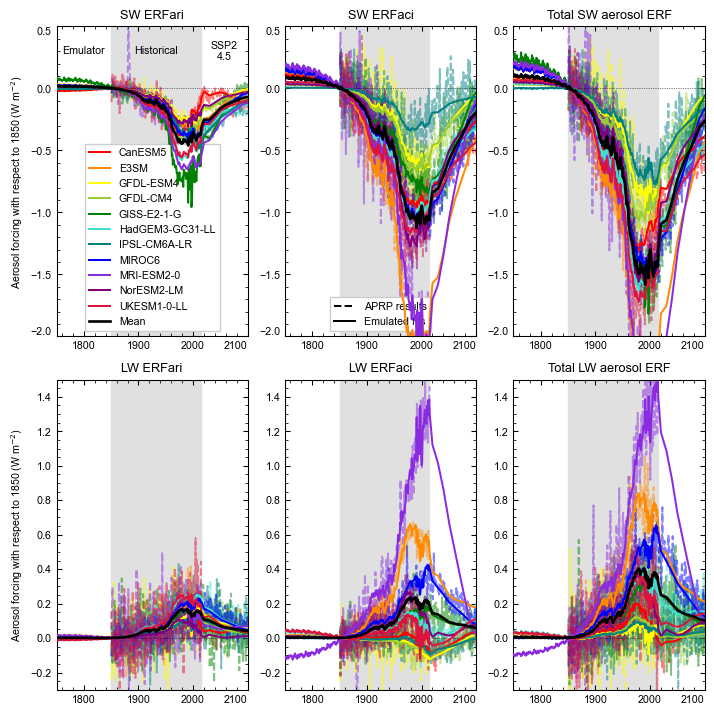

In [90]:
fig, ax = pl.subplots(2,3,figsize=(19/2.54,19/2.54), squeeze=False)
for model in models:
    ax[0,0].set_title('SW ERFari')
    ax[0,0].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW'], color=colors[model], ls='--', alpha=0.5)
    ax[0,0].plot(np.arange(1750,2101), emulated[model]['ERFariSW'], color=colors[model], label=model, zorder=7)
    ax[0,1].set_title('SW ERFaci')
    ax[0,1].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFaciSW'],#-cubes[model]['aprp_ERFariSW'], 
                 color=colors[model], ls='--', alpha=0.5)
    ax[0,1].plot(np.arange(1750,2101), emulated[model]['ERFaciSW'], color=colors[model], zorder=7)
    ax[0,2].set_title('Total SW aerosol ERF')
    ax[0,2].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW']+cubes[model]['aprp_ERFaciSW'],#-cubes[model]['aprp_ERFariSW'], 
                 color=colors[model], ls='--', alpha=0.5)
    ax[0,2].plot(np.arange(1750,2101), emulated[model]['ERFariSW']+emulated[model]['ERFaciSW'], color=colors[model], zorder=7)
    ax[1,0].set_title('LW ERFari')
    ax[1,0].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariLW'], color=colors[model], ls='--', alpha=0.5)
    ax[1,0].plot(np.arange(1750,2101), emulated[model]['ERFariLW'], color=colors[model], label=model, zorder=7)
    ax[1,1].set_title('LW ERFaci')
    ax[1,1].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFaciLW'],#-cubes[model]['aprp_ERFariSW'], 
                 color=colors[model], ls='--', alpha=0.5)
    ax[1,1].plot(np.arange(1750,2101), emulated[model]['ERFaciLW'], color=colors[model], zorder=7)
    ax[1,2].set_title('Total LW aerosol ERF')
    ax[1,2].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariLW']+cubes[model]['aprp_ERFaciLW'],#-cubes[model]['aprp_ERFariSW'], 
                 color=colors[model], ls='--', alpha=0.5)
    ax[1,2].plot(np.arange(1750,2101), emulated[model]['ERFariLW']+emulated[model]['ERFaciLW'], color=colors[model], zorder=7)

ax[0,0].plot(np.arange(1750,2101), emulated['mean']['ERFariSW'], color=colors['mean'], label='Mean', lw=2, zorder=7)
ax[0,1].plot(np.arange(1750,2101), emulated['mean']['ERFaciSW'], color=colors['mean'], lw=2, zorder=7)
ax[0,2].plot(np.arange(1750,2101), emulated['mean']['ERFariSW']+emulated['mean']['ERFaciSW'], color=colors['mean'], lw=2, zorder=7)
ax[1,0].plot(np.arange(1750,2101), emulated['mean']['ERFariLW'], color=colors['mean'], label='Mean', lw=2, zorder=7)
ax[1,1].plot(np.arange(1750,2101), emulated['mean']['ERFaciLW'], color=colors['mean'], lw=2, zorder=7)
ax[1,2].plot(np.arange(1750,2101), emulated['mean']['ERFariLW']+emulated['mean']['ERFaciLW'], color=colors['mean'], lw=2, zorder=7)

ax[0,0].set_xlim(1750,2100)
ax[0,1].set_xlim(1750,2100)
ax[0,2].set_xlim(1750,2100)
ax[1,0].set_xlim(1750,2100)
ax[1,1].set_xlim(1750,2100)
ax[1,2].set_xlim(1750,2100)
ax[0,0].set_ylabel('Aerosol forcing with respect to 1850 (W m$^{-2}$)')
ax[1,0].set_ylabel('Aerosol forcing with respect to 1850 (W m$^{-2}$)')
ax[0,0].legend(framealpha=1, loc='lower center', fancybox=False)
ax[0,0].set_ylim(-2.0, 0.5)
ax[0,1].set_ylim(-2.0, 0.5)
ax[0,2].set_ylim(-2.0, 0.5)
ax[1,0].set_ylim(-0.3, 1.5)
ax[1,1].set_ylim(-0.3, 1.5)
ax[1,2].set_ylim(-0.3, 1.5)

ax[0,0].axhline(0, lw=0.5, ls=':', color='k')
ax[0,1].axhline(0, lw=0.5, ls=':', color='k')
ax[0,2].axhline(0, lw=0.5, ls=':', color='k')
ax[1,0].axhline(0, lw=0.5, ls=':', color='k')
ax[1,1].axhline(0, lw=0.5, ls=':', color='k')
ax[1,2].axhline(0, lw=0.5, ls=':', color='k')
#ax[0,0].axvline(2014.5, lw=0.5, color='#c0c0c0')
ax[0,0].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,1].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,2].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[1,0].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[1,1].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[1,2].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,0].text(1800, 0.3, 'Emulator', ha='center', va='center')
ax[0,0].text(0.5*(1850+2015), 0.3, 'Historical', ha='center', va='center')
ax[0,0].text(0.5*(2015+2100), 0.3, 'SSP2\n4.5', ha='center', va='center')

#ax[0,0].set_xticks(np.arange(1750,2101,50))
for i in range(2):
    for j in range(3):
        ax[i,j].get_xticklabels()[-1].set_ha("right")
        ax[i,j].get_yticklabels()[-1].set_va("top")
        ax[i,j].get_yticklabels()[0].set_va("bottom")

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', ls='--'),
                Line2D([0], [0], color='k', ls='-')]

ax[0,1].legend(custom_lines, ['APRP results', 'Emulated fits'], framealpha=1, loc='lower center', fancybox=False)
fig.tight_layout()

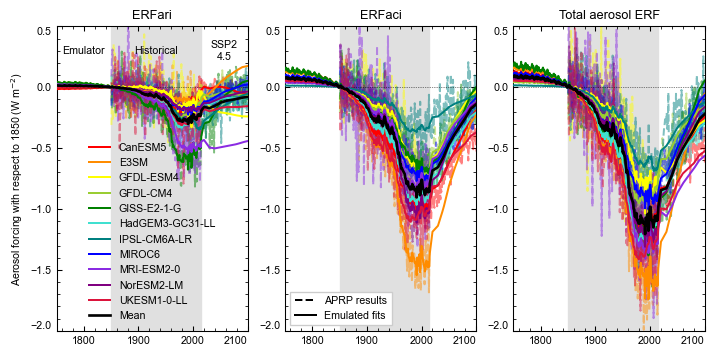

In [126]:
fig, ax = pl.subplots(1,3,figsize=(19/2.54,9.5/2.54), squeeze=False)
for model in models:
    ax[0,0].set_title('ERFari')
    ax[0,0].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW'] + cubes[model]['aprp_ERFariLW'], color=colors[model], ls='--', alpha=0.5)
    ax[0,0].plot(np.arange(1750,2101), emulated[model]['ERFari'], color=colors[model], label=model, zorder=7)
    ax[0,1].set_title('ERFaci')
    ax[0,1].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFaciSW']+cubes[model]['aprp_ERFaciLW'], 
                 color=colors[model], ls='--', alpha=0.5)
    ax[0,1].plot(np.arange(1750,2101), emulated[model]['ERFaci'], color=colors[model], zorder=7)
    ax[0,2].set_title('Total aerosol ERF')
    ax[0,2].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW']+cubes[model]['aprp_ERFaciSW']+cubes[model]['aprp_ERFariLW']+cubes[model]['aprp_ERFaciLW'], 
                 color=colors[model], ls='--', alpha=0.5)
    ax[0,2].plot(np.arange(1750,2101), emulated[model]['ERFari']+emulated[model]['ERFaci'], color=colors[model], zorder=7)
ax[0,0].plot(np.arange(1750,2101), emulated['mean']['ERFari'], color=colors['mean'], label='Mean', lw=2, zorder=7)
ax[0,1].plot(np.arange(1750,2101), emulated['mean']['ERFaci'], color=colors['mean'], lw=2, zorder=7)
ax[0,2].plot(np.arange(1750,2101), emulated['mean']['ERFari']+emulated['mean']['ERFaci'], color=colors['mean'], lw=2, zorder=7)
ax[0,0].set_xlim(1750,2100)
ax[0,1].set_xlim(1750,2100)
ax[0,2].set_xlim(1750,2100)
ax[0,0].set_ylabel('Aerosol forcing with respect to 1850 (W m$^{-2}$)')
#ax[0,1].set_ylabel('ERFaci with respect to 1850')
ax[0,0].legend(framealpha=1, loc='lower center', fancybox=False, frameon=False)
ax[0,0].set_ylim(-2.0, 0.5)
ax[0,1].set_ylim(-2.0, 0.5)
ax[0,2].set_ylim(-2.0, 0.5)

ax[0,0].axhline(0, lw=0.5, ls=':', color='k')
ax[0,1].axhline(0, lw=0.5, ls=':', color='k')
ax[0,2].axhline(0, lw=0.5, ls=':', color='k')
#ax[0,0].axvline(2014.5, lw=0.5, color='#c0c0c0')
ax[0,0].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,1].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,2].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)

ax[0,0].text(1800, 0.3, 'Emulator', ha='center', va='center')
ax[0,0].text(0.5*(1850+2015), 0.3, 'Historical', ha='center', va='center')
ax[0,0].text(0.5*(2015+2100), 0.3, 'SSP2\n4.5', ha='center', va='center')


#ax[0,0].set_xticks(np.arange(1750,2101,50))
ax[0,0].get_xticklabels()[-1].set_ha("right")
ax[0,1].get_xticklabels()[-1].set_ha("right")
ax[0,2].get_xticklabels()[-1].set_ha("right")

ax[0,0].get_yticklabels()[-1].set_va("top")
ax[0,1].get_yticklabels()[-1].set_va("top")
ax[0,2].get_yticklabels()[-1].set_va("top")

ax[0,0].get_yticklabels()[0].set_va("bottom")
ax[0,1].get_yticklabels()[0].set_va("bottom")
ax[0,2].get_yticklabels()[0].set_va("bottom")

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', ls='--'),
                Line2D([0], [0], color='k', ls='-')]

ax[0,1].legend(custom_lines, ['APRP results', 'Emulated fits'], framealpha=1, loc='lower left', fancybox=False)
fig.tight_layout()

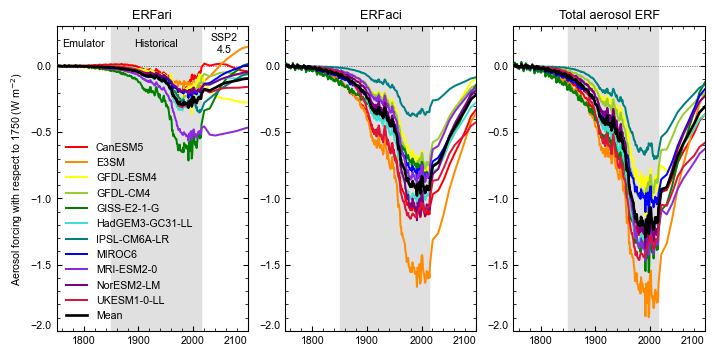

In [127]:
fig, ax = pl.subplots(1,3,figsize=(19/2.54,9.5/2.54), squeeze=False)
for model in models:
    ax[0,0].set_title('ERFari')
    ax[0,0].plot(np.arange(1750.5,2101), emulated[model]['ERFari']-emulated[model]['ERFari'][0], color=colors[model], label=model, zorder=7)
    ax[0,1].set_title('ERFaci')
    ax[0,1].plot(np.arange(1750.5,2101), emulated[model]['ERFaci']-emulated[model]['ERFaci'][0], color=colors[model], zorder=7)
    ax[0,2].set_title('Total aerosol ERF')
    ax[0,2].plot(np.arange(1750.5,2101), emulated[model]['ERFari']+emulated[model]['ERFaci']-(emulated[model]['ERFari']+emulated[model]['ERFaci'])[0], color=colors[model], zorder=7)
ax[0,0].plot(np.arange(1750.5,2101), emulated['mean']['ERFari']-emulated['mean']['ERFari'][0], color=colors['mean'], label='Mean', lw=2, zorder=7)
ax[0,1].plot(np.arange(1750.5,2101), emulated['mean']['ERFaci']-emulated['mean']['ERFaci'][0], color=colors['mean'], lw=2, zorder=7)
ax[0,2].plot(np.arange(1750.5,2101), emulated['mean']['ERFari']+emulated['mean']['ERFaci']-(emulated['mean']['ERFari']+emulated['mean']['ERFaci'])[0], color=colors['mean'], lw=2, zorder=7)
ax[0,0].set_xlim(1750,2100)
ax[0,1].set_xlim(1750,2100)
ax[0,2].set_xlim(1750,2100)
ax[0,0].set_ylabel('Aerosol forcing with respect to 1750 (W m$^{-2}$)')
#ax[0,1].set_ylabel('ERFaci with respect to 1850')
ax[0,0].legend(framealpha=1, loc='lower left', frameon=False)
ax[0,0].set_ylim(-2, 0.3)
ax[0,1].set_ylim(-2, 0.3)
ax[0,2].set_ylim(-2, 0.3)

ax[0,0].axhline(0, lw=0.5, ls=':', color='k')
ax[0,1].axhline(0, lw=0.5, ls=':', color='k')
ax[0,2].axhline(0, lw=0.5, ls=':', color='k')
#ax[0,0].axvline(2014.5, lw=0.5, color='#c0c0c0')
ax[0,0].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,1].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,2].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)

ax[0,0].text(1800, 0.17, 'Emulator', ha='center', va='center')
ax[0,0].text(0.5*(1850+2015), 0.17, 'Historical', ha='center', va='center')
ax[0,0].text(0.5*(2015+2100), 0.17, 'SSP2\n4.5', ha='center', va='center')


#ax[0,0].set_xticks(np.arange(1750,2101,50))
ax[0,0].get_xticklabels()[-1].set_ha("right")
ax[0,1].get_xticklabels()[-1].set_ha("right")
ax[0,2].get_xticklabels()[-1].set_ha("right")

ax[0,0].get_yticklabels()[-1].set_va("top")
ax[0,1].get_yticklabels()[-1].set_va("top")
ax[0,2].get_yticklabels()[-1].set_va("top")

ax[0,0].get_yticklabels()[0].set_va("bottom")
ax[0,1].get_yticklabels()[0].set_va("bottom")
ax[0,2].get_yticklabels()[0].set_va("bottom")

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', ls='--'),
                Line2D([0], [0], color='k', ls='-')]

#ax[0,1].legend(custom_lines, ['APRP results', 'Emulated fits'], framealpha=1, loc='lower left', frameon=False)
fig.tight_layout()

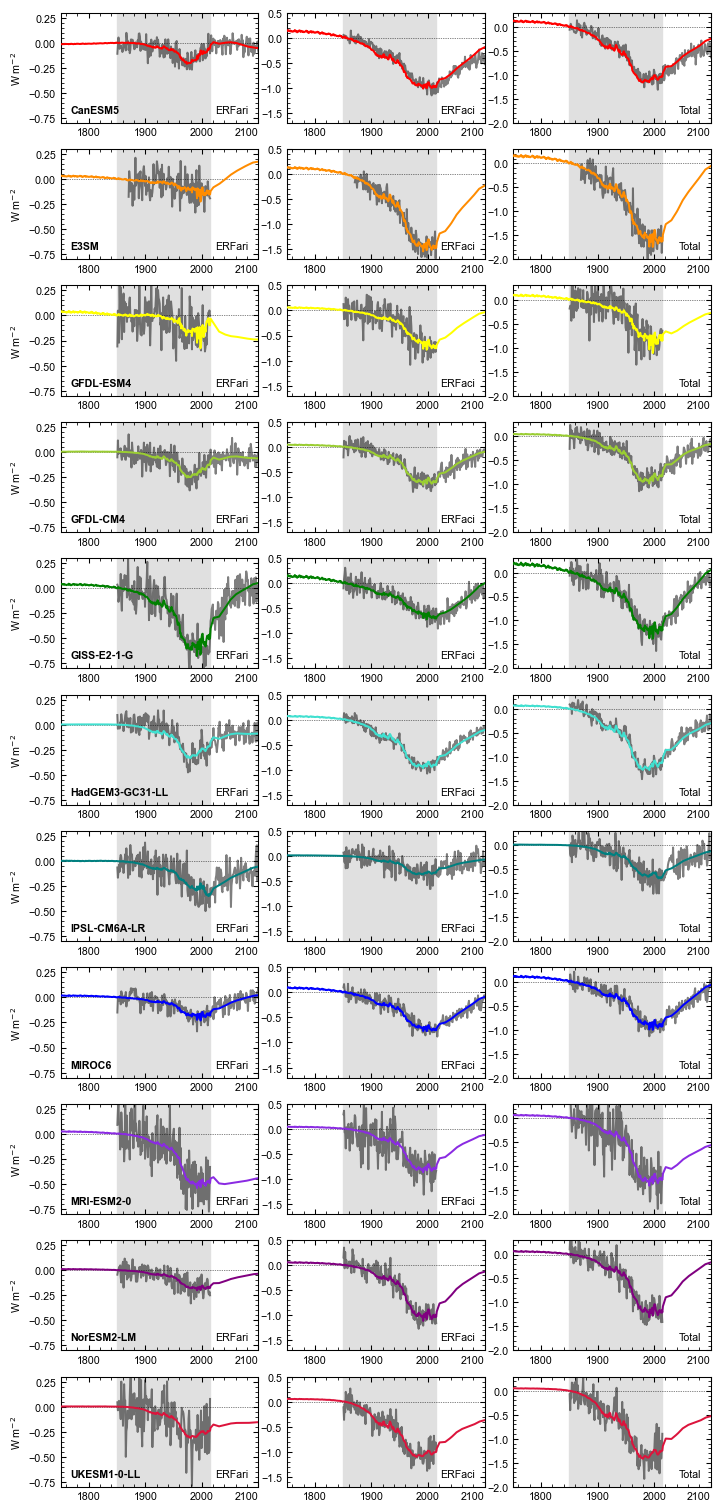

In [128]:
fig, ax = pl.subplots(11,3,figsize=(19/2.54,40/2.54), squeeze=False)
for i, model in enumerate(models):
#    ax[i,0].set_title('%s ERFari' % model)
    ax[i,0].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW'] + cubes[model]['aprp_ERFariLW'], color='k', ls='-', alpha=0.5, label=model)
    ax[i,0].plot(np.arange(1750.5,2101), emulated[model]['ERFari'], color=colors[model], label=model, zorder=7)
#    ax[i,1].set_title('%s ERFaci' % model)
    ax[i,1].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFaciSW']+cubes[model]['aprp_ERFaciLW'], 
                 color='k', ls='-', alpha=0.5)
    ax[i,1].plot(np.arange(1750.5,2101), emulated[model]['ERFaci'], color=colors[model], zorder=7)
#    ax[i,2].set_title('%s aerosol ERF' % models)
    ax[i,2].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW']+cubes[model]['aprp_ERFaciSW']+cubes[model]['aprp_ERFariLW']+cubes[model]['aprp_ERFaciLW'], 
                 color='k', ls='-', alpha=0.5)
    ax[i,2].plot(np.arange(1750.5,2101), emulated[model]['ERFari']+emulated[model]['ERFaci'], color=colors[model], zorder=7)
    ax[i,0].set_xlim(1750,2100)
    ax[i,1].set_xlim(1750,2100)
    ax[i,2].set_xlim(1750,2100)
#    ax[i,0].set_ylabel('Aerosol forcing with respect to 1850 (W m$^{-2}$)')
    ax[i,0].set_ylim(-0.8, 0.3)
    ax[i,1].set_ylim(-1.7, 0.5)
    ax[i,2].set_ylim(-2.0, 0.3)
    ax[i,0].axhline(0, lw=0.5, ls=':', color='k')
    ax[i,1].axhline(0, lw=0.5, ls=':', color='k')
    ax[i,2].axhline(0, lw=0.5, ls=':', color='k')
    ax[i,0].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
    ax[i,1].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
    ax[i,2].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
    ax[i,0].get_xticklabels()[-1].set_ha("right")
    ax[i,1].get_xticklabels()[-1].set_ha("right")
    ax[i,2].get_xticklabels()[-1].set_ha("right")
    #ax[i,0].legend(loc='lower left', frameon=False)
    ax[i,0].text(0.05,0.09,model,transform=ax[i,0].transAxes, fontweight='bold')
    ax[i,0].text(0.95,0.09,'ERFari',transform=ax[i,0].transAxes, ha='right')
    ax[i,1].text(0.95,0.09,'ERFaci',transform=ax[i,1].transAxes, ha='right')
    ax[i,2].text(0.95,0.09,'Total',transform=ax[i,2].transAxes, ha='right')
    ax[i,0].set_ylabel('W m$^{-2}$')

#ax[0,1].set_ylabel('ERFaci with respect to 1850')
#ax[0,0].legend(framealpha=1, loc='lower center', fancybox=False)

#ax[0,0].axvline(2014.5, lw=0.5, color='#c0c0c0')

#ax[0,0].set_xticks(np.arange(1750,2101,50))

#ax[0,1].legend(custom_lines, ['APRP results', 'Emulated fits'], framealpha=1, loc='lower left', fancybox=False)
fig.tight_layout()

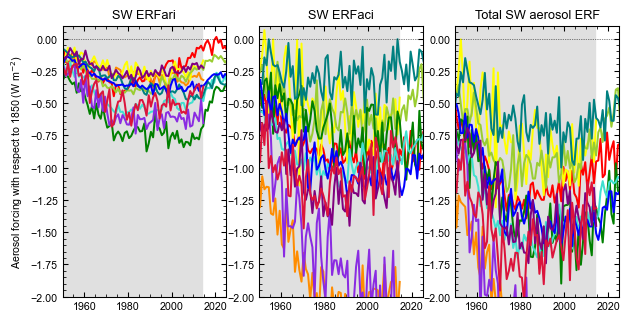

In [129]:
fig, ax = pl.subplots(1,3,figsize=(19/2.54,9.5/2.54), squeeze=False)
for model in models:
    ax[0,0].set_title('SW ERFari')
    ax[0,0].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW'], color=colors[model])
    ax[0,1].set_title('SW ERFaci')
    ax[0,1].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFaciSW'], color=colors[model])
    ax[0,2].set_title('Total SW aerosol ERF')
    ax[0,2].plot(np.arange(startyear[model]+0.5,endyear[model]+1), cubes[model]['aprp_ERFariSW']+cubes[model]['aprp_ERFaciSW'],
                 color=colors[model])
ax[0,0].set_xlim(1950,2025)
ax[0,1].set_xlim(1950,2025)
ax[0,2].set_xlim(1950,2025)
ax[0,0].set_ylabel('Aerosol forcing with respect to 1850 (W m$^{-2}$)')
ax[0,0].set_ylim(-2.0, 0.1)
ax[0,1].set_ylim(-2.0, 0.1)
ax[0,2].set_ylim(-2.0, 0.1)

ax[0,0].axhline(0, lw=0.5, ls=':', color='k')
ax[0,1].axhline(0, lw=0.5, ls=':', color='k')
ax[0,2].axhline(0, lw=0.5, ls=':', color='k')
#ax[0,0].axvline(2014.5, lw=0.5, color='#c0c0c0')
ax[0,0].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,1].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)
ax[0,2].fill_between(np.arange(1850,2015),-10,10, color='#e0e0e0', zorder=-20)

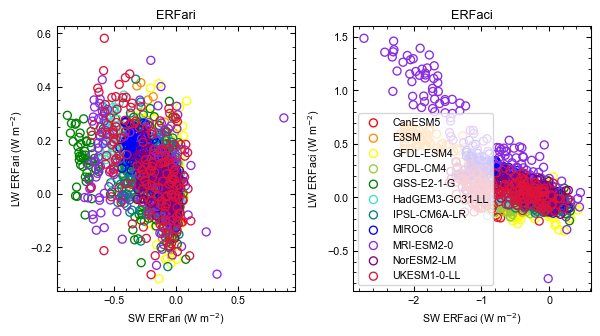

In [97]:
fig, ax = pl.subplots(1,2,figsize=(16/2.54,9/2.54))
swaridata = np.empty(0)
lwaridata = np.empty(0)
swacidata = np.empty(0)
lwacidata = np.empty(0)
for model in models:
    ax[0].scatter(cubes[model]['aprp_ERFariSW'], cubes[model]['aprp_ERFariLW'], edgecolor=colors[model], facecolor='None', marker='o')
    swaridata = np.append(swaridata, cubes[model]['aprp_ERFariSW'])
    lwaridata = np.append(lwaridata, cubes[model]['aprp_ERFariLW'])
    ax[1].scatter(cubes[model]['aprp_ERFaciSW'], cubes[model]['aprp_ERFaciLW'], edgecolor=colors[model], facecolor='None', label=model)
    swacidata = np.append(swacidata, cubes[model]['aprp_ERFaciSW'])
    lwacidata = np.append(lwacidata, cubes[model]['aprp_ERFaciLW'])
ax[0].set_xlabel('SW ERFari (W m$^{-2}$)')
ax[0].set_ylabel('LW ERFari (W m$^{-2}$)')
ax[0].set_title('ERFari')
ax[1].set_xlabel('SW ERFaci (W m$^{-2}$)')
ax[1].set_ylabel('LW ERFaci (W m$^{-2}$)')
ax[1].set_title('ERFaci')
ax[1].legend()
fig.tight_layout()

In [130]:
so2_samp_ari = np.zeros(len(models))
bc_samp_ari = np.zeros(len(models))
oc_samp_ari = np.zeros(len(models))
nh3_samp_ari = np.zeros(len(models))
log_n0_samp = np.zeros(len(models))
log_n1_samp = np.zeros(len(models))
beta_samp = np.zeros(len(models))

for im, model in enumerate(models):
    print(model)
    print(coeff[model]['ERFari'])
    print(coeff[model]['ERFaci'])
    so2_samp_ari[im] = coeff[model]['ERFari']['SO2']
    bc_samp_ari[im] = coeff[model]['ERFari']['BC']
    oc_samp_ari[im] = coeff[model]['ERFari']['OC']
    nh3_samp_ari[im] = coeff[model]['ERFari']['NH3']
    beta_samp[im] = (coeff[model]['ERFaci']['beta'])
    log_n0_samp[im] = np.log(coeff[model]['ERFaci']['n0'])
    log_n1_samp[im] = np.log(coeff[model]['ERFaci']['n1'])
print()
print('SO2 mean', np.mean(so2_samp_ari))
print('BC mean', np.mean(bc_samp_ari))
print('OC mean', np.mean(oc_samp_ari)) # nice and linear!
print('NH3 mean', np.mean(nh3_samp_ari))
print('SO2 std', np.std(so2_samp_ari))
print('BC std', np.std(bc_samp_ari))
print('OC std', np.std(oc_samp_ari))
print('NH3 std', np.std(nh3_samp_ari))
print()
print('beta mean', np.mean(beta_samp))
print('nSO2 mean', np.mean(log_n0_samp))
print('nPOM mean', np.mean(log_n1_samp))
print('beta std', np.std(beta_samp))
print('log(nSO2) std', np.std(log_n0_samp))
print('log(nPOM) std', np.std(log_n1_samp))
print()

CanESM5
{'BC': 0.01821194813916677, 'OC': 0.0032379551664162604, 'SO2': -0.0023324018183248133, 'NH3': 0.00032368830387703533}
{'beta': 0.7274280482209131, 'n0': 58.948256009813534, 'n1': 24.616574697043426}
E3SM
{'BC': 0.007593714840488314, 'OC': -0.013575315077893434, 'SO2': -0.0010611390354645035, 'NH3': 0.00272683707398688}
{'beta': 2.048199015674559, 'n0': 155.89798763985385, 'n1': 71.34329387801755}
GFDL-ESM4
{'BC': 0.13493439390098963, 'OC': -0.02862815230090891, 'SO2': -0.0024094344169756092, 'NH3': -0.005251755460471152}
{'beta': 4622.750761356794, 'n0': 1364044.9351159409, 'n1': 302504.10246399144}
GFDL-CM4
{'BC': 0.03707030298200224, 'OC': -0.004635426997174194, 'SO2': -0.0027160357310696444, 'NH3': -0.00022989574953375479}
{'beta': 3.501467247104388, 'n0': 692.7326230898171, 'n1': 382.8948919524911}
GISS-E2-1-G
{'BC': 0.04536637557100881, 'OC': -0.01903257010137109, 'SO2': -0.005590750221437261, 'NH3': 0.002267964822945212}
{'beta': 0.5630170513364652, 'n0': 117.88588368071

In [98]:
so2_samp_arisw = np.zeros(len(models))
bc_samp_arisw = np.zeros(len(models))
oc_samp_arisw = np.zeros(len(models))
so2_samp_arilw = np.zeros(len(models))
bc_samp_arilw = np.zeros(len(models))
oc_samp_arilw = np.zeros(len(models))
so2_samp_acilw = np.zeros(len(models))
bc_samp_acilw = np.zeros(len(models))
oc_samp_acilw = np.zeros(len(models))

n0_samp_sw = np.zeros(len(models))
n1_samp_sw = np.zeros(len(models))
log_n0_samp_sw = np.zeros(len(models))
log_n1_samp_sw = np.zeros(len(models))
beta_samp_sw = np.zeros(len(models))

so2_samp_ari = np.zeros(len(models))
bc_samp_ari = np.zeros(len(models))
oc_samp_ari = np.zeros(len(models))
log_n0_samp = np.zeros(len(models))
log_n1_samp = np.zeros(len(models))
beta_samp = np.zeros(len(models))

for im, model in enumerate(models):
    print(model)
    print(coeff[model]['ERFariSW'])
    print(coeff[model]['ERFaciSW'])
    print(coeff[model]['ERFariLW'])
    print(coeff[model]['ERFaciLW'])
    print(coeff[model]['ERFari'])
    print(coeff[model]['ERFaci'])
    so2_samp_ari[im] = coeff[model]['ERFari']['SO2']
    bc_samp_ari[im] = coeff[model]['ERFari']['BC']
    oc_samp_ari[im] = coeff[model]['ERFari']['OC']
    beta_samp[im] = (coeff[model]['ERFaci']['beta'])
    log_n0_samp[im] = np.log(coeff[model]['ERFaci']['n0'])
    log_n1_samp[im] = np.log(coeff[model]['ERFaci']['n1'])
    so2_samp_arisw[im] = coeff[model]['ERFariSW']['SO2']
    bc_samp_arisw[im] = coeff[model]['ERFariSW']['BC']
    oc_samp_arisw[im] = coeff[model]['ERFariSW']['OC']
    beta_samp_sw[im] = (coeff[model]['ERFaciSW']['beta'])
    n0_samp_sw[im] = coeff[model]['ERFaciSW']['n0']
    n1_samp_sw[im] = coeff[model]['ERFaciSW']['n1']
    log_n0_samp_sw[im] = np.log(coeff[model]['ERFaciSW']['n0'])
    log_n1_samp_sw[im] = np.log(coeff[model]['ERFaciSW']['n1'])
    so2_samp_arilw[im] = coeff[model]['ERFariLW']['SO2']
    bc_samp_arilw[im] = coeff[model]['ERFariLW']['BC']
    oc_samp_arilw[im] = coeff[model]['ERFariLW']['OC']
    so2_samp_acilw[im] = coeff[model]['ERFaciLW']['SO2']
    bc_samp_acilw[im] = coeff[model]['ERFaciLW']['BC']
    oc_samp_acilw[im] = coeff[model]['ERFaciLW']['OC']
print('SO2 mean SW', np.mean(so2_samp_arisw))
print('BC mean SW', np.mean(bc_samp_arisw))
print('OC mean SW', np.mean(oc_samp_arisw)) # nice and linear!
print('SO2 std SW', np.std(so2_samp_arisw))
print('BC std SW', np.std(bc_samp_arisw))
print('OC std SW', np.std(oc_samp_arisw))
print()
print('beta mean SW', np.mean(beta_samp_sw))
print('nSO2 mean SW', np.mean(log_n0_samp_sw))
print('nPOM mean SW', np.mean(log_n1_samp_sw))
print('beta std SW', np.std(beta_samp_sw))
print('log(nSO2) std SW', np.std(log_n0_samp_sw))
print('log(nPOM) std SW', np.std(log_n1_samp_sw))
print()
print('SO2 mean LWari', np.mean(so2_samp_arilw))
print('BC mean LWari', np.mean(bc_samp_arilw))
print('OC mean LWari', np.mean(oc_samp_arilw)) # nice and linear!
print('SO2 std LWari', np.std(so2_samp_arilw))
print('BC std LWari', np.std(bc_samp_arilw))
print('OC std LWari', np.std(oc_samp_arilw))
print()
print('SO2 mean LWaci', np.mean(so2_samp_acilw))
print('BC mean LWaci', np.mean(bc_samp_acilw))
print('OC mean LWaci', np.mean(oc_samp_acilw)) # nice and linear!
print('SO2 std LWaci', np.std(so2_samp_acilw))
print('BC std LWaci', np.std(bc_samp_acilw))
print('OC std LWaci', np.std(oc_samp_acilw))
print()
print('SO2 mean', np.mean(so2_samp_ari))
print('BC mean', np.mean(bc_samp_ari))
print('OC mean', np.mean(oc_samp_ari)) # nice and linear!
print('SO2 std', np.std(so2_samp_ari))
print('BC std', np.std(bc_samp_ari))
print('OC std', np.std(oc_samp_ari))
print()
print('beta mean', np.mean(beta_samp))
print('nSO2 mean', np.mean(log_n0_samp))
print('nPOM mean', np.mean(log_n1_samp))
print('beta std', np.std(beta_samp))
print('log(nSO2) std', np.std(log_n0_samp))
print('log(nPOM) std', np.std(log_n1_samp))
print()

CanESM5
{'BC': 0.03314440675958311, 'OC': 0.004900408846471833, 'SO2': -0.004089355479802377}
{'beta': 0.5957636372848456, 'n0': 38.94600587831774, 'n1': 29.707484924645197}
{'BC': -0.0005509681875554557, 'OC': -0.005247060614045343, 'SO2': 0.001601739693686517}
{'BC': -0.007341196339684393, 'OC': -0.005448577106989792, 'SO2': 0.0006412811431194864}
{'BC': 0.032593451736307455, 'OC': -0.0003466560003011253, 'SO2': -0.0024876159811954126}
{'beta': 0.7274280482209131, 'n0': 58.948256009813534, 'n1': 24.616574697043426}
E3SM
{'BC': 0.01116518687664124, 'OC': -0.010873916779358509, 'SO2': -0.001962611881693702}
{'beta': 2.760786791377392, 'n0': 133.94300410174853, 'n1': 105.86631365679148}
{'BC': 0.013657993672043765, 'OC': -0.0017582715556718974, 'SO2': 0.0010205210261035912}
{'BC': 0.046250688218788936, 'OC': -0.015901258297967368, 'SO2': 0.004368004897550313}
{'BC': 0.024823191240579547, 'OC': -0.012632191557587148, 'SO2': -0.0009420910165031626}
{'beta': 2.048199015674559, 'n0': 155.89

In [99]:
with open("../data_input/cmip6_aerosol_coefficients.json", "w") as write_file:
    json.dump(coeff, write_file, indent=4)

In [100]:
erfaci = np.zeros(11)
for i, model in enumerate(models):
    erfaci[i] = np.mean(cubes[model]['aprp_ERFaciSW'][155:166]+cubes[model]['aprp_ERFaciLW'][155:166])

In [101]:
np.corrcoef([erfaci, log_n0_samp, log_n1_samp, so2_samp_ari, bc_samp_ari, oc_samp_ari])

array([[        nan,         nan,         nan,         nan,         nan,
                nan],
       [        nan,  1.        ,  0.96297128,  0.17841563,  0.14560831,
        -0.21699183],
       [        nan,  0.96297128,  1.        ,  0.30709868, -0.05614121,
        -0.02057305],
       [        nan,  0.17841563,  0.30709868,  1.        , -0.7670355 ,
         0.70773182],
       [        nan,  0.14560831, -0.05614121, -0.7670355 ,  1.        ,
        -0.93606009],
       [        nan, -0.21699183, -0.02057305,  0.70773182, -0.93606009,
         1.        ]])

In [102]:
np.corrcoef([so2_samp_arisw, bc_samp_arisw, oc_samp_arisw])

array([[ 1.        , -0.74947275,  0.62106794],
       [-0.74947275,  1.        , -0.90032462],
       [ 0.62106794, -0.90032462,  1.        ]])

(array([2.8000e+01, 5.8600e+02, 3.7960e+03, 1.1128e+04, 3.0182e+04,
        3.4132e+04, 1.3931e+04, 4.9490e+03, 1.2080e+03, 6.0000e+01]),
 array([-0.27090515, -0.21440226, -0.15789938, -0.1013965 , -0.04489362,
         0.01160927,  0.06811215,  0.12461503,  0.18111792,  0.2376208 ,
         0.29412368]),
 <BarContainer object of 10 artists>)

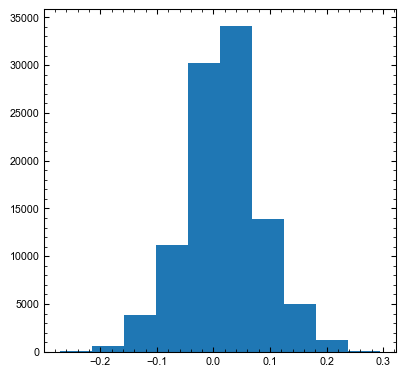

In [103]:
kde = gaussian_kde([so2_samp_arisw, bc_samp_arisw, oc_samp_arisw, so2_samp_arilw, bc_samp_arilw, oc_samp_arilw])
arisw_sample = kde.resample(size=100000, seed=827026783)
pl.hist(arisw_sample[1,:])

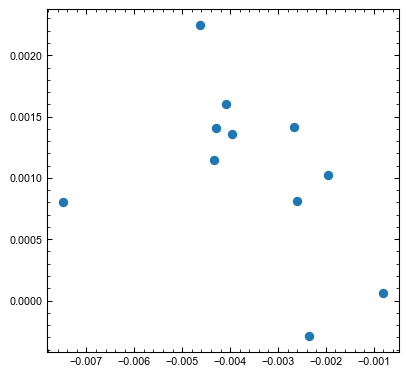

In [104]:
pl.scatter(so2_samp_arisw, so2_samp_arilw)

In [105]:
kde = gaussian_kde([log_n0_samp, log_n1_samp])
aci_sample=kde.resample(size=100000, seed=63648708)
kde = gaussian_kde([so2_samp_ari, bc_samp_ari, oc_samp_ari])
ari_sample=kde.resample(size=100000, seed=685534562)

In [107]:
df = pd.DataFrame(aci_sample.T, columns=['log(n_SO2)', 'log(n_POM)'])
df.to_csv('../data_input/ERFaci_samples.csv', index=False)

df = pd.DataFrame(ari_sample.T, columns=['SO2', 'BC', 'OC'])
df.to_csv('../data_input/ERFari_samples.csv', index=False)

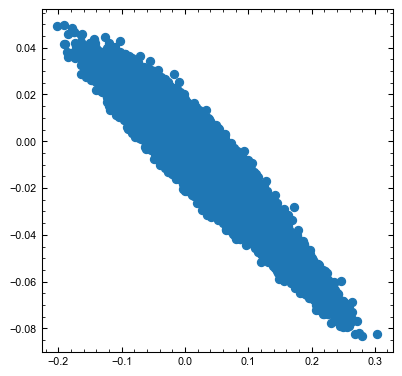

In [108]:
pl.scatter(ari_sample[1,:], ari_sample[2,:])

In [109]:
print(coeff['mean']['ERFari'])
print(coeff['mean']['ERFaci'])

{'BC': 0.03045532067478382, 'OC': -0.009720311695107064, 'SO2': -0.0025105414022952473}
{'beta': 1.2005337344232396, 'n0': 154.26571382933466, 'n1': 76.29460368569993}


In [110]:
emulator = np.zeros((351,11))
for i, model in enumerate(models):
    emulator[:,i] = emulated[model]['ERFariSW']+emulated[model]['ERFaciSW']+emulated[model]['ERFariLW']+emulated[model]['ERFaciLW']
df = pd.DataFrame(emulator, columns=models)
df['year'] = np.arange(1750,2101)
df.set_index('year', inplace=True)
df.to_csv('../data_output/ERFaer_model_emulations.csv')

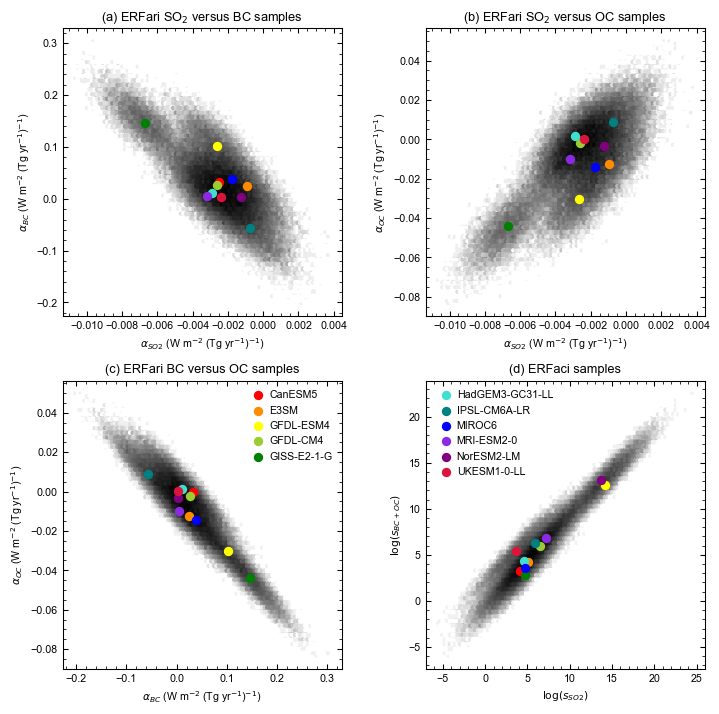

In [111]:
fig = pl.figure(figsize=(19/2.54,19/2.54))

ax = fig.add_subplot(221)
ax.hexbin(ari_sample[0,:], ari_sample[1,:], cmap='Greys',  bins='log')
ax.set_xlabel(r'$\alpha_{SO2}$ (W m$^{-2}$ (Tg yr$^{-1}$)$^{-1}$)')
ax.set_ylabel(r'$\alpha_{BC}$ (W m$^{-2}$ (Tg yr$^{-1}$)$^{-1}$)')
for model in models:
    ax.scatter(coeff[model]['ERFari']['SO2'], coeff[model]['ERFari']['BC'], color=colors[model], label=model, alpha=1)
ax.set_title('(a) ERFari SO$_2$ versus BC samples')

ax = fig.add_subplot(222)
ax.hexbin(ari_sample[0,:], ari_sample[2,:], cmap='Greys',  bins='log')
ax.set_xlabel(r'$\alpha_{SO2}$ (W m$^{-2}$ (Tg yr$^{-1}$)$^{-1}$)')
ax.set_ylabel(r'$\alpha_{OC}$ (W m$^{-2}$ (Tg yr$^{-1}$)$^{-1}$)')
for model in models:
    ax.scatter(coeff[model]['ERFari']['SO2'], coeff[model]['ERFari']['OC'], color=colors[model], label=model, alpha=1)
ax.set_title('(b) ERFari SO$_2$ versus OC samples')

ax = fig.add_subplot(223)
ax.hexbin(ari_sample[1,:], ari_sample[2,:], cmap='Greys',  bins='log')
for i, model in enumerate(models):
    if i<5:
        label = model
    else:
        label = ''
    ax.scatter(coeff[model]['ERFari']['BC'], coeff[model]['ERFari']['OC'], color=colors[model], label=label, alpha=1)
ax.set_title('(c) ERFari BC versus OC samples')
ax.set_xlabel(r'$\alpha_{BC}$ (W m$^{-2}$ (Tg yr$^{-1}$)$^{-1}$)')
ax.set_ylabel(r'$\alpha_{OC}$ (W m$^{-2}$ (Tg yr$^{-1}$)$^{-1}$)')
ax.legend(frameon=False, handletextpad=0.02)
    
ax = fig.add_subplot(224)
ax.hexbin(aci_sample[0,:],aci_sample[1,:], cmap='Greys',  bins='log')
ax.set_xlabel(r'$\log(s_{SO2})$')
ax.set_ylabel(r'$\log(s_{BC+OC})$')
for i, model in enumerate(models):
    if i<5:
        label = ''
    else:
        label = model
    ax.scatter(np.log(coeff[model]['ERFaci']['n0']), np.log(coeff[model]['ERFaci']['n1']), color=colors[model], label=label)
ax.set_title('(d) ERFaci samples')
ax.legend(frameon=False, handletextpad=0.02)

fig.tight_layout()
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)